In [1]:
using Graphs
using SimpleWeightedGraphs
using Dice 
using PrettyTables
include("intro.jl")

using GraphPlot
using HNProcess
using DataRefine

Currently active project is: HN_V2

Path of active project: /Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2

Have fun with your new project!

You can help us improve DrWatson by opening
issues on GitHub, submitting feature requests,
or even opening your own Pull Requests!



[ Info: Precompiling HNProcess [top-level] (cache misses: include_dependency fsize change (2))


In [2]:
#= template

image = [
    1 1 1;
    1 1 1;
    1 1 1;
] 
=#

i1 = [
    1 1 1;
    1 1 1;
    1 1 1;
] 

i2 = [
    1 -1 1;
    -1 1 -1;
    1 -1 1;
] 


# Take image matrix and turn it into a vector with the rows being coancenated at their endpoints
# ex: [row1,row2,row3]

sim_time = 4
steps = 1500
parameters = Dict{String, Any}(
    "images" => [i1,i2],
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 100, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => 1.0,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => [(1,1,1)]
)

Dict{String, Any} with 8 entries:
  "images"          => [[1 1 1; 1 1 1; 1 1 1], [1 -1 1; -1 1 -1; 1 -1 1]]
  "scaling"         => 1.0
  "iterations"      => 100
  "steps"           => 1500
  "num_agitations"  => 1
  "initial_stimuli" => [(1, 1, 1)]
  "sim_time"        => 4
  "delta"           => -0.00266667

┌ Warning: Note: adding edges with a zero weight to this graph type has no effect.
└ @ SimpleWeightedGraphs ~/.julia/packages/SimpleWeightedGraphs/Ab8wv/src/simpleweightedgraph.jl:182


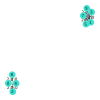

In [3]:
# Graph Checker
graph = get_HN_graph(parameters["images"],1.0)

elabels = [weights(graph)[e.src, e.dst] for e in edges(graph)]

# Plot with edge labels
gplot(graph, 
      nodelabel=1:nv(graph), 
      edgelabel=round.(elabels, digits=2),)

In [4]:
converged = 0
bad_states = []
suffix_fail = "bad"
for i in 1:parameters["iterations"]
    global res = HN_Solver_Traj(parameters)
    if (reshape(res[1][1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
        -1 .*reshape(res[1][1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
        converged += 1
    else
        save_trajectories(res[2], "3by3", "FAIL_$i")
        println("FAILURE AT $i iteration!")
        pretty_table(reshape(res[1][1],size(parameters["images"][1],1),size(parameters["images"][1],1)))
    end
    
end
save_trajectories(res[2], "3by3", "last")
println("\nNum converged: $(converged) \nRatio: $(converged/parameters["iterations"])")

File 3by3_1_FAIL_5.dat is generated
FAILURE AT 5 iteration!
┌────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │
├────────┼────────┼────────┤
│      1 │      1 │      1 │
│     -1 │      1 │      1 │
│      1 │     -1 │      1 │
└────────┴────────┴────────┘
File 3by3_1_FAIL_9.dat is generated
FAILURE AT 9 iteration!
┌────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │
├────────┼────────┼────────┤
│      1 │     -1 │      1 │
│     -1 │     -1 │     -1 │
│     -1 │     -1 │      1 │
└────────┴────────┴────────┘
File 3by3_1_FAIL_17.dat is generated
FAILURE AT 17 iteration!
┌────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │
├────────┼────────┼────────┤
│      1 │     -1 │      1 │
│     -1 │     -1 │     -1 │
│     -1 │     -1 │     -1 │
└────────┴────────┴────────┘
File 3by3_1_FAIL_64.dat is generated
FAILURE AT 64 iteration!
┌────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │
├────────┼────────┼────────┤
│      1 │     -1 │      1 │
│     -1 │     -1 │     -1 │
│ 

In [5]:
using Plots

In [6]:
sol = HN_Solver_Traj(parameters, true);
save_trajectories(sol[2], "3by3", "yes")

┌────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │
├────────┼────────┼────────┤
│      1 │     -1 │      1 │
│     -1 │      1 │     -1 │
│      1 │     -1 │      1 │
└────────┴────────┴────────┘
File 3by3_1_yes.dat is generated


In [7]:
function iterative_rotater_state(state, debug = false)
    rotations = []
    for i in state[2]
        rotated = Dice.realign_hybrid(state, 1+i)
        if debug
            println("rotated by $i")
            pretty_table(reshape(rotated[1],size(parameters["images"][1],1),size(parameters["images"][1],1)))
        end
        push!(rotations, rotated)
    end
    return rotations
end

iterative_rotater_state (generic function with 2 methods)

In [8]:
function iterative_rotater_list(state, list, debug = false)
    rotations = []
    for i in list
        rotated = Dice.realign_hybrid(state, 1+i)
        if debug
            println("rotated by $i")
            pretty_table(reshape(rotated[1],size(parameters["images"][1],1),size(parameters["images"][1],1)))
        end
        push!(rotations, rotated)
    end
    return rotations
end

iterative_rotater_list (generic function with 2 methods)

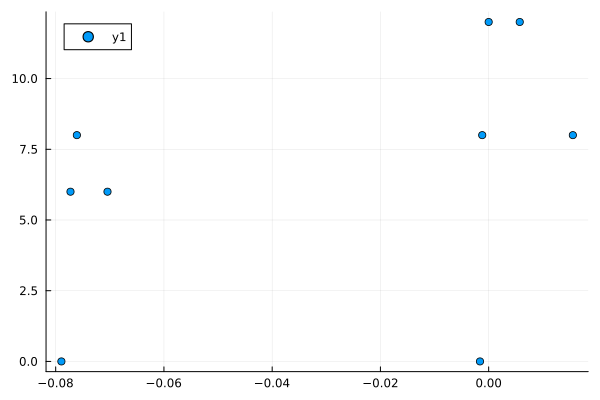

In [10]:
rot = iterative_rotater_state(sol[1])
g = get_HN_graph(parameters["images"],1.0)
binary = [i[1] for i in rot]
x = sol[1][2]
y = [Dice.cut(g,s) for s in (rot[k][1] for k in 1:length(rot))]
scatter(x,y)

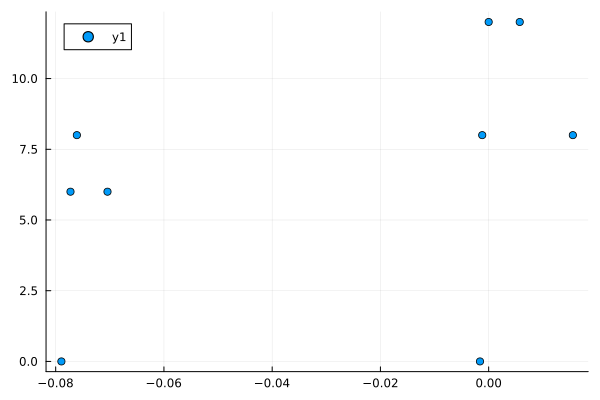

In [15]:
HN_cut_plotter(parameters, sol[1])

In [14]:
function HN_cut_plotter(params, state)
    rot = iterative_rotater_state(sol[1])
    g = get_HN_graph(params["images"],params["scaling"])
    binary = [i[1] for i in rot]
    x = sol[1][2]
    y = [Dice.cut(g,s) for s in (rot[k][1] for k in 1:length(rot))]
    p = scatter(x,y)
    return p
end

HN_cut_plotter (generic function with 1 method)

In [104]:
state = sol[1]
g = get_HN_graph(parameters["images"],1.0)
for i in state[2]
    println(i)
    rotated = Dice.realign_hybrid(state, 1+i)
    println(rotated)
    cut = Dice.cut(g,rotated[1])
    println("Rotated by $i, cut is $cut") 
    pretty_table(reshape(rotated[1],size(parameters["images"][1],1),size(parameters["images"][1],1)))
end

0.0
(Int8[1, 1, 1, 1, -1, 1, -1, 1, 1], [-1.0, -0.3337562774545524, -0.9918899089811264, -0.3332020959012314, 0.9905361647541508, -0.3318289104929075, 0.9989845739929559, -0.33123725608268817, -0.9834854764924374])
Rotated by 0.0, cut is 12.0
┌────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │
├────────┼────────┼────────┤
│      1 │      1 │     -1 │
│      1 │     -1 │      1 │
│      1 │      1 │      1 │
└────────┴────────┴────────┘
0.6662437225454475
(Int8[-1, 1, -1, 1, -1, 1, -1, 1, -1], [0.3337562774545524, -1.0, 0.3418663684734258, -0.999445818446679, 0.32429244220870324, -0.9980726330383551, 0.3327408514475083, -0.9974809786281362, 0.3502708009621147])
Rotated by 0.6662437225454475, cut is 0.0
┌────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │
├────────┼────────┼────────┤
│     -1 │      1 │     -1 │
│      1 │     -1 │      1 │
│     -1 │      1 │     -1 │
└────────┴────────┴────────┘
0.00811009101887331
(Int8[-1, 1, 1, 1, -1, 1, -1, 1, 1], [0.9918899089811266, -0

In [99]:
sol_rotate = sol[1];
r = 0.6662437225454475
println("ORIGINAL")
println(sol_rotate[2][1])
pretty_table(reshape(sol_rotate[1],size(parameters["images"][1],1),size(parameters["images"][1],1)))
rotated = Dice.realign_hybrid(sol_rotate,-r)
println("ROTATED BY $r")
println(rotated[2][1])
pretty_table(reshape(rotated[1],size(parameters["images"][1],1),size(parameters["images"][1],1)))
if sol_rotate[1] == rotated[1]
    println("Same")
else 
    println("Diff")
end
println(sol_rotate[2])
println(rotated[2])

ORIGINAL
0.0
┌────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │
├────────┼────────┼────────┤
│      1 │      1 │      1 │
│      1 │      1 │      1 │
│      1 │      1 │      1 │
└────────┴────────┴────────┘
ROTATED BY 0.6662437225454475
0.6662437225454476
┌────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │
├────────┼────────┼────────┤
│      1 │     -1 │      1 │
│     -1 │      1 │     -1 │
│      1 │     -1 │      1 │
└────────┴────────┴────────┘
Diff
[0.0, 0.6662437225454475, 0.00811009101887331, 0.6667979040987687, -0.009463835245849065, 0.6681710895070926, -0.0010154260070439243, 0.6687627439173116, 0.016514523507562433]
[0.6662437225454476, -0.6675125549091048, 0.6743538135643208, -0.6669583733557838, 0.6567798872995985, -0.6655851879474604, 0.6652282965384035, -0.664993533537241, 0.6827582460530097]


In [82]:
function realign_hybrid_TEST(conf::Hybrid, r=0.0)::Hybrid
    # Changes the reference point for the separated representation by `r`
    # Rotates by -r, so if x = 0 then rotated by r would yield x = -r
    # according to xi - r = sigma(r) + X(r)
    # INPUT & OUTPUT:
    #     conf = (sigma, X)
    V = Dice.hybrid_to_cont(conf, 0.0)
    return Dice.cont_to_hybrid(V, r)
end

realign_hybrid_TEST (generic function with 2 methods)

In [117]:
for i in -2:0.05:2
    println(i)
end

-2.0
-1.95
-1.9
-1.85
-1.8
-1.75
-1.7
-1.65
-1.6
-1.55
-1.5
-1.45
-1.4
-1.35
-1.3
-1.25
-1.2
-1.15
-1.1
-1.05
-1.0
-0.95
-0.9
-0.85
-0.8
-0.75
-0.7
-0.65
-0.6
-0.55
-0.5
-0.45
-0.4
-0.35
-0.3
-0.25
-0.2
-0.15
-0.1
-0.05
0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
1.0
1.05
1.1
1.15
1.2
1.25
1.3
1.35
1.4
1.45
1.5
1.55
1.6
1.65
1.7
1.75
1.8
1.85
1.9
1.95
2.0
